In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import os
from functools import reduce
from scipy.stats import chisquare
from pandas.tools.plotting import scatter_matrix

pd.set_option('display.max_columns', 500)

In [2]:
#data_path = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop/fpl/data') 
data_path = './data'
idlist_file ='/player_idlist.csv'
gws_path = '/gws/'
players_path = '/players/'

In [3]:
idlist = pd.read_csv(data_path + '/2018-19/' + idlist_file)

cleaned_players = pd.read_csv(data_path + '/2018-19/' + 'cleaned_players.csv')
cleaned_players['fullname'] = cleaned_players['first_name'] + cleaned_players['second_name']
idlist.rename(columns={'id':'player_id'}, inplace=True)
cleaned_players.rename(columns={'id':'player_id'}, inplace=True)
element_types = pd.read_csv(data_path + '/2018-19/' + 'element_types_raw.csv')
teams = pd.read_csv(data_path + '/2018-19/' + 'teams_raw.csv')

In [4]:
def swap_columns(players):
    gws = players.gw
    elements = players.element
    
    players.drop(columns=['gw', 'element'], axis=1, inplace=True)
    players = pd.concat([gws, elements, players], axis=1)
    
    return players

In [5]:
players = pd.DataFrame()

for index, row in idlist.iterrows():
    first_name = row['first_name']
    second_name = row['second_name']
    play_id = str(row['player_id'])
    
    player_path = '/' + first_name + '_' + second_name + '_' + play_id + '/'
    
    player = pd.read_csv(data_path + '/2018-19/' + players_path + player_path + 'gw.csv')
    player['gw'] = np.arange(player.shape[0]) + 1
    players = pd.concat([players, player], axis=0)

In [6]:
players = swap_columns(players)

players.rename(columns={'element' : 'player_id',
                        'total_points' : 'points'}, inplace=True)

players['value'] = players['value'] / 10
players['roi'] = players['points'] / players['value']

players.reset_index(drop=True, inplace=True)

In [7]:
players.shape

(11529, 56)

In [8]:
players.head()

,gw,player_id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,roi
0,1,1,0,42,0,0,0,24,0,2,31,0.0,0,0,0,0,1,0,2,0,4.7,1,47.0,0,2018-08-12T15:00:00Z,12 Aug 16:00,0,0,90,0,0,13,0,0,0,0,9,0,1,6,70767,0,0,0,2.0,0.0,0.0,3,0,0,0,5.0,True,0,0,0.6
1,2,1,0,35,0,0,0,26,0,1,25,0.0,0,0,0,0,14,0,3,0,5.3,526,53.0,0,2018-08-18T16:30:00Z,18 Aug 17:30,0,0,90,0,0,6,0,0,0,0,8,0,2,8,90038,0,0,0,2.0,3.0,0.0,3,188,6059,5871,5.0,False,0,0,0.6
2,3,1,0,24,0,0,0,17,0,0,20,0.0,0,0,0,0,21,0,1,0,2.8,1053,27.8,0,2018-08-25T14:00:00Z,25 Aug 15:00,0,0,90,0,0,19,0,0,0,0,10,0,3,4,107301,0,0,0,1.0,3.0,0.0,3,8540,19550,11010,5.0,True,0,0,0.6
3,4,1,0,38,0,0,0,8,0,0,24,0.0,0,0,0,2,33,0,2,0,0.2,1584,2.4,0,2018-09-02T12:30:00Z,02 Sep 13:30,0,0,90,0,0,5,0,0,0,0,8,0,4,1,123566,0,0,0,3.0,2.0,0.0,1,9582,19332,9750,5.0,False,0,0,0.2
4,5,1,0,33,0,0,0,13,0,2,23,0.0,0,0,0,0,46,0,1,0,1.4,2121,14.2,0,2018-09-15T14:00:00Z,15 Sep 15:00,0,0,90,0,0,15,0,0,0,0,13,0,5,1,123310,0,0,0,2.0,1.0,0.0,2,-3297,8837,12134,5.0,False,0,0,0.4


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11529 entries, 0 to 11528
Data columns (total 56 columns):
gw                                 11529 non-null int64
player_id                          11529 non-null int64
assists                            11529 non-null int64
attempted_passes                   11529 non-null int64
big_chances_created                11529 non-null int64
big_chances_missed                 11529 non-null int64
bonus                              11529 non-null int64
bps                                11529 non-null int64
clean_sheets                       11529 non-null int64
clearances_blocks_interceptions    11529 non-null int64
completed_passes                   11529 non-null int64
creativity                         11529 non-null float64
dribbles                           11529 non-null int64
ea_index                           11529 non-null int64
errors_leading_to_goal             11529 non-null int64
errors_leading_to_goal_attempt     11529 non-null

In [10]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%d' % int(height),
                ha='center', va='bottom')

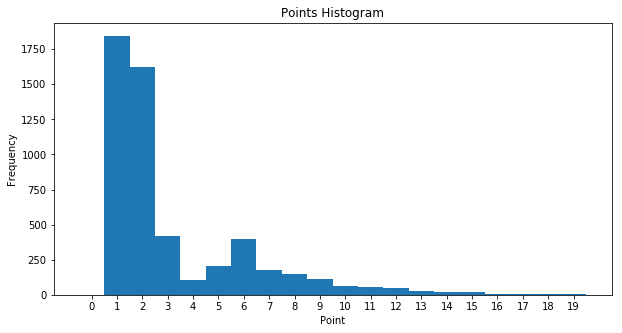

In [11]:
scored_players = players.loc[players['points'] > 0, :]

max_point = scored_players['points'].max()
bins = bins=np.arange(0, max_point, 1)

plt.figure(figsize=(10, 5))
plt.hist(scored_players['points'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("Points Histogram")
plt.ylabel("Frequency")
plt.xlabel("Point")
plt.show()

<span style='color:green'>Most of the players will have points around 1-2 points per week</span>

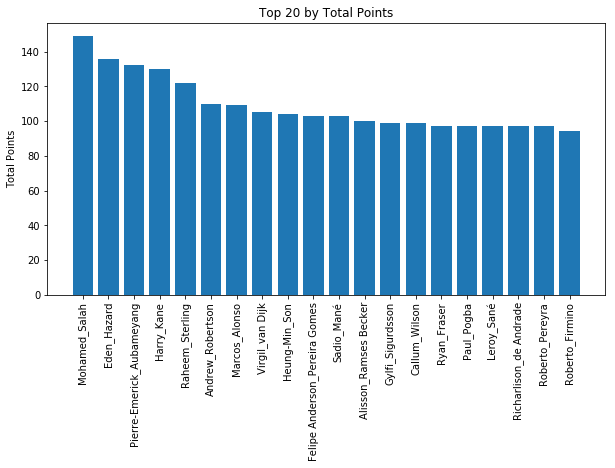

In [12]:
top_10 = players.groupby(players.player_id, as_index=False)['points'].sum().sort_values('points', ascending =False)[:20]

top_10 = pd.merge(top_10, idlist, left_on='player_id', right_on='player_id', how='inner')
top_10['full_name'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['full_name'], top_10['points'])
plt.xticks(rotation=90)
plt.ylabel('Total Points')
plt.title('Top 20 by Total Points')
plt.show()

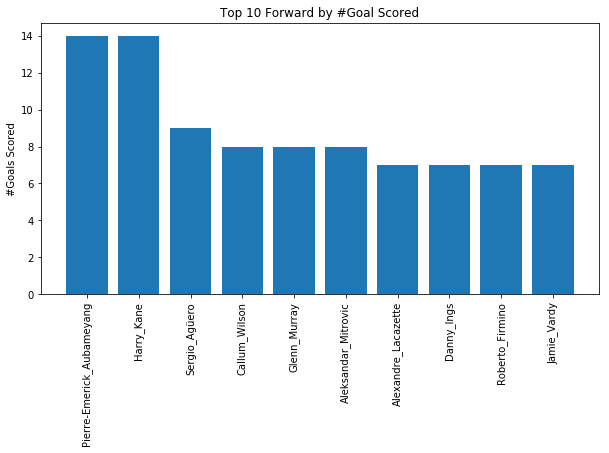

In [13]:
df = players.merge(cleaned_players.loc[:, ['player_id', 'element_type']], on='player_id')
top_scorer = df.loc[df['element_type'] == 4,:].groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
top_scorer = top_scorer.merge(cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']])
top_scorer['full_name'] = top_scorer['first_name'] + '_' + top_scorer['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_scorer['full_name'], top_scorer['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 Forward by #Goal Scored')
plt.show()

<span style='color:green'>Even Lukaku can made it on top 10,  C'mon
   he's not that bad</span>

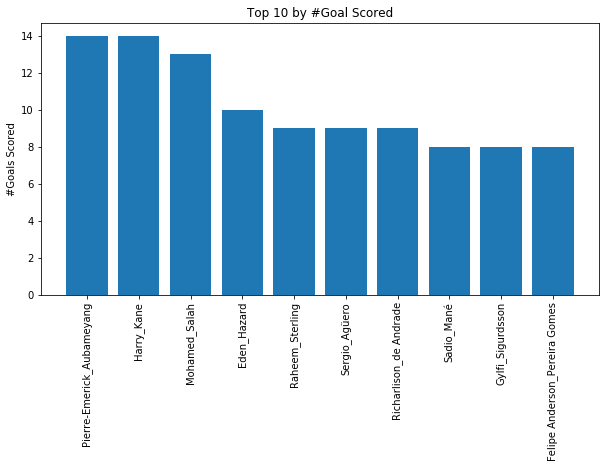

In [14]:
df = players.groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
df = pd.merge(df, cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']], on='player_id', how='inner')
df['full_name'] = df['first_name'] + '_' + df['second_name']

plt.figure(figsize=(10, 5))
plt.bar(df['full_name'], df['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 by #Goal Scored')
plt.show()


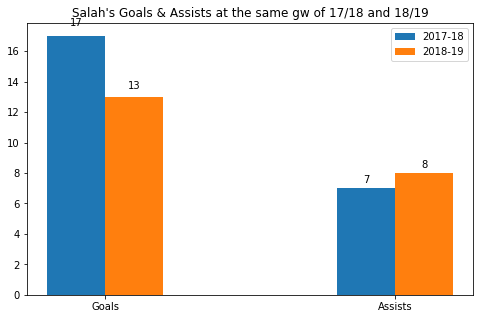

In [15]:
salah_prev = pd.read_csv(data_path + '/2017-18/' + 'players/' + 'Mohamed_Salah/gw.csv')
salah_now = players.loc[players['player_id'] == 253, :]
salah_prev_until_this_gw = salah_prev.loc[:salah_now.shape[0]-1, :]

now_goals = salah_now['goals_scored'].sum() 
now_assists =  salah_now['assists'].sum()
prev_goals = salah_prev_until_this_gw['goals_scored'].sum() 
prev_assists = salah_prev_until_this_gw['assists'].sum()

n = 2 
ind = np.arange(n)
width = 0.20

fig, ax = plt.subplots()
fig.set_size_inches(h=5, w=8)
rect_prev = ax.bar(ind, [prev_goals, prev_assists], width, label='2017-18')
rect_now = ax.bar(ind+width, [now_goals, now_assists], width, label='2018-19')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("Goals", "Assists"))
ax.set_title("Salah's Goals & Assists at the same gw of 17/18 and 18/19")
plt.legend()

autolabel(rect_prev)
autolabel(rect_now)
plt.show()

<span style='color:green'>Mo Salah is absolutly not a ONE YEAR WONDER</span>

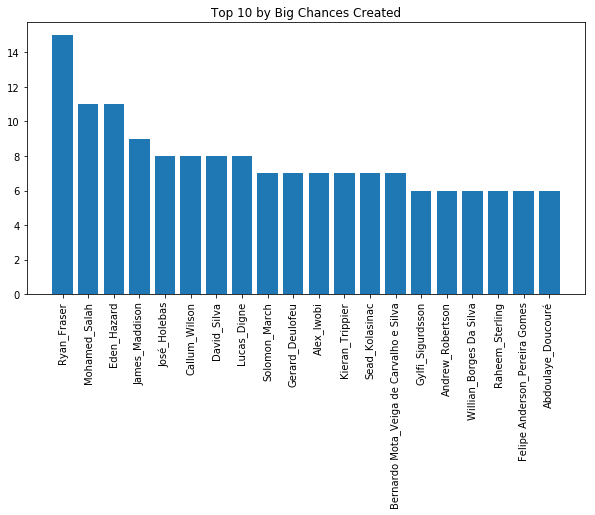

In [16]:
top_10 = players.groupby('player_id', as_index=False)['big_chances_created'].sum().sort_values('big_chances_created', ascending=False)[:20]
top_10 = top_10.merge(cleaned_players.loc[:, ('player_id', 'first_name', 'second_name')], on='player_id')
top_10['fullname'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['fullname'], top_10['big_chances_created'])
plt.xticks(rotation=90)
plt.title("Top 10 by Big Chances Created")
plt.show()

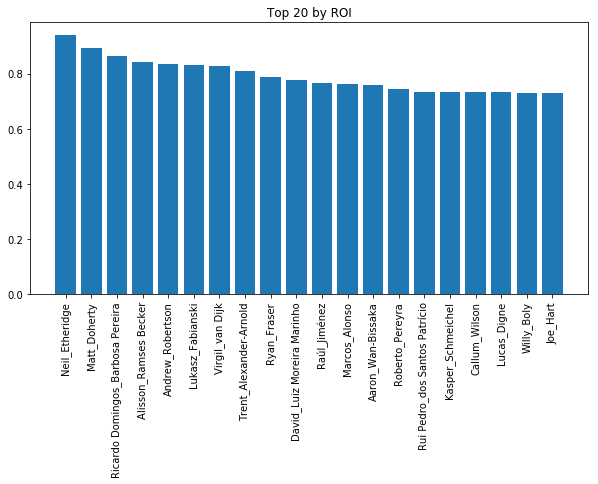

In [17]:
top_by_roi = players.groupby('player_id', as_index=False)['roi'].mean()
top_by_roi = top_by_roi.merge(cleaned_players.loc[:,('player_id', 'team', 'element_type', 'first_name', 'second_name')], on='player_id')
top_by_roi = top_by_roi.merge(teams.loc[:, ('id', 'name')], left_on='team', right_on='id')
top_by_roi.drop(columns=['team','id'], inplace=True)
top_by_roi['fullname'] = top_by_roi['first_name'] + '_' + top_by_roi['second_name']
top_by_roi.drop(columns=['first_name', 'second_name'], inplace=True)
top_by_roi.rename(columns={'name': 'team'}, inplace=True)

top_by_roi = pd.merge(top_by_roi, element_types.loc[:, ('id', 'singular_name_short')], left_on='element_type', right_on='id', how='inner')
top_by_roi.drop(columns=['id', 'element_type'], inplace=True)
top_by_roi.rename(columns={'singular_name_short':'position'}, inplace=True)

top_by_roi.sort_values('roi', ascending=False, inplace=True)

top_20_roi = top_by_roi[:20]

plt.figure(figsize=(10, 5))
plt.bar(top_20_roi['fullname'], top_20_roi['roi'])
plt.xticks(rotation=90)
plt.title('Top 20 by ROI')
plt.show()


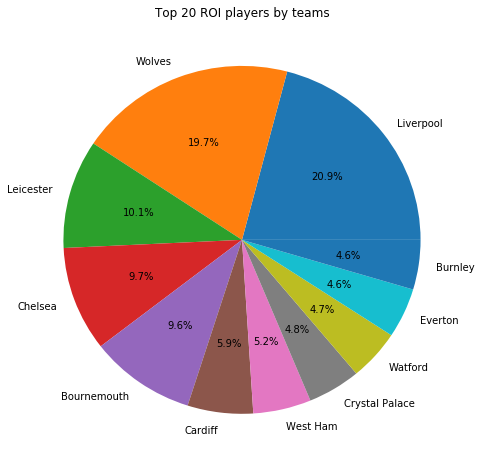

In [18]:
top_team_roi = top_20_roi.groupby('team', as_index=False)['roi'].sum().sort_values('roi', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(top_team_roi['roi'], labels=top_team_roi['team'], autopct='%1.1f%%')
plt.title("Top 20 ROI players by teams")
plt.show()

<span style='color:green'>You should invest more in Wolves, Bournewmouth and Watford</span>

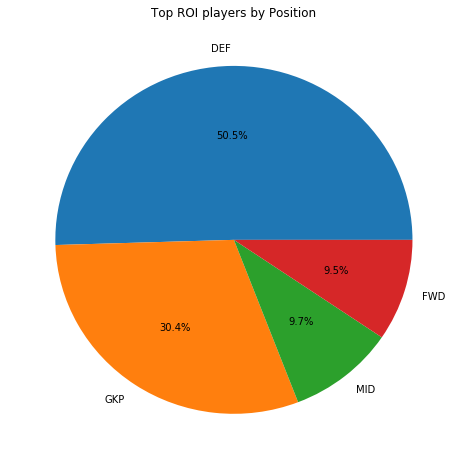

In [19]:
df = top_20_roi.groupby('position', as_index=False)['roi'].sum().sort_values('roi', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df['roi'], labels=df['position'], autopct='%1.1f%%')
plt.title('Top ROI players by Position')
plt.show()


<span style='color:green'>You should invest more in DEF and GK</span>

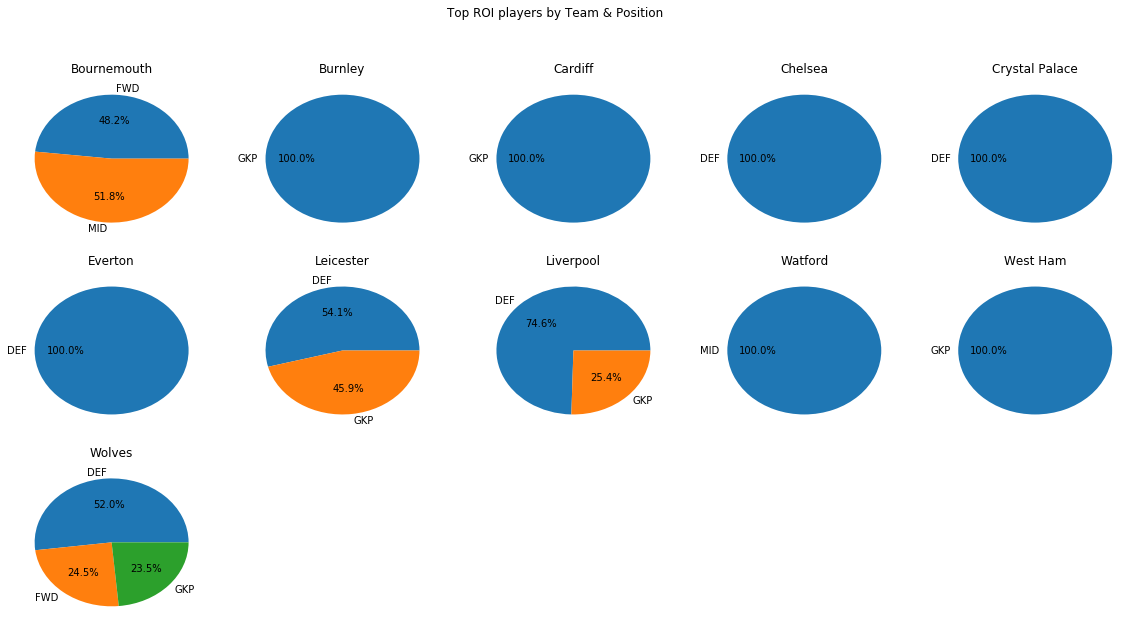

In [20]:
top_roi_teams = list(top_20_roi.groupby('team').groups.keys())

n_col = 5
n_row = int(np.ceil(len(top_roi_teams) / n_col))

plt.figure(figsize=(20, 10))
for index, team in enumerate(top_roi_teams):
    top_20_roi_by_team = top_20_roi.loc[top_20_roi['team'] == team, :]
    top_20_roi_by_team_by_position = top_20_roi_by_team.groupby('position', as_index=False)['roi'].sum()
    top_20_roi_by_team_by_position['roi'] = top_20_roi_by_team_by_position['roi'] *100
    
    plt.subplot(n_row, n_col, index+1)
    plt.pie(top_20_roi_by_team_by_position['roi'], labels=top_20_roi_by_team_by_position['position'], autopct='%1.1f%%')
    plt.gca().set_title(team)
        
plt.gcf().suptitle("Top ROI players by Team & Position")
plt.show()


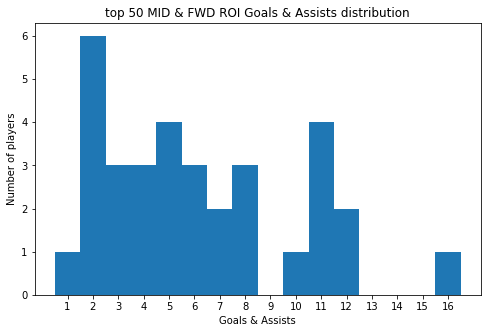

In [21]:
df = top_by_roi[:50].copy()
df = df.loc[df['position'] != 'GKP', :]
for player_id in df['player_id']:
    player = players.loc[players['player_id'] == player_id,:]
    goals_assists = player['goals_scored'].sum() + player['assists'].sum()
    df.loc[df['player_id'] == player_id,'goals_assists'] = goals_assists
    
bins = np.arange(df['goals_assists'].min(), df['goals_assists'].max() + 2, 1)

plt.figure(figsize=(8, 5))
plt.hist(df['goals_assists'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("top 50 MID & FWD ROI Goals & Assists distribution")
plt.xlabel("Goals & Assists")
plt.ylabel("Number of players")
plt.show()

<span style='color:green'>It seems like there are someone who neither score nor assist, how can he made on the top ROI list? </span>

In [22]:
df.loc[df['goals_assists'] == 0, :]

,player_id,roi,team,fullname,position,goals_assists


<span style='color:green'>The guy is Mamadou Sakho, former Liverpool player</span><br>
<span style='color:green'>Let's investigate on his stats</span>

In [23]:
sakho = players.loc[players['player_id'] == 143, :]
print("Sakho Performances after {0} GWs ".format(sakho.shape[0]))
print("Goals: ", sakho['goals_scored'].sum())
print("Assists: ", sakho['assists'].sum())
print("Clean Sheet: ", sakho['clean_sheets'].sum())
print("Cost mean: ", sakho['value'].mean())
print("Total Points: ", sakho['points'].sum())

Sakho Performances after 21 GWs 
Goals:  0
Assists:  0
Clean Sheet:  7
Cost mean:  4.961904761904764
Total Points:  64


In [24]:
def consistency(events):
    return sum(events != 0)

def chisquare_score(observations, expectaions=None):
    return chisquare(observations, expectaions)[0]

base_aggregations = [np.sum, np.mean]

forwardids = list(cleaned_players.loc[cleaned_players['element_type'] == 4, 'player_id'])
forwards = players.loc[[ player_id in forwardids for player_id in players['player_id']], :]

fw_stats_by_player_id = forwards.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'offside' : base_aggregations,
    'penalties_missed' : np.sum
})

#plt.figure(figsize=(10, 8))

x = fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']
y = fw_stats_by_player_id['goals_scored']['mean'] +  fw_stats_by_player_id['assists']['mean'] 
#colors = fw_stats_by_player_id['roi']['mean']
#sizes = fw_stats_by_player_id['points']['sum']

#plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 10, alpha=0.6)
#cbar = plt.colorbar()
#plt.xlabel("Goals & Assists Consistensy")
#plt.ylabel("Goals & Assists Mean")
#cbar.ax.set_ylabel("price")
#plt.title("Forwards Stats")
#plt.grid(True)
#for index, row in fw_stats_by_player_id.iterrows():
#    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
#plt.show()

/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


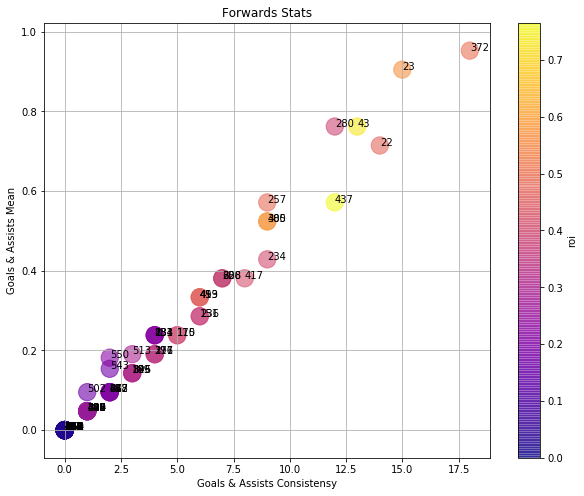

In [25]:
colors = fw_stats_by_player_id['roi']['mean']

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
cbar.ax.set_ylabel("roi")

plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
plt.title("Forwards Stats")
plt.grid(True)
for index, row in fw_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

### Top Right cluster

In [26]:
#top right cluster
top_right_bools = (fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']) > 10
ids = fw_stats_by_player_id.loc[top_right_bools, :]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
20,22,Alexandre,Lacazette,1,3,4,7,8,94,1286,16,268.8,475.2,612.0,11,309,135.1,2,0,1,7.0,94,AlexandreLacazette
21,23,Pierre-Emerick,Aubameyang,1,3,4,14,5,132,1640,27,297.6,616.0,794.0,21,480,170.6,4,0,0,35.6,114,Pierre-EmerickAubameyang
48,43,Callum,Wilson,2,91,4,8,8,99,1574,28,286.0,415.4,675.0,11,303,137.3,5,0,3,30.6,67,CallumWilson
357,280,Sergio,Agüero,13,43,4,9,7,92,1157,9,301.2,446.4,863.0,9,347,160.9,7,0,4,21.7,112,SergioAgüero
469,372,Harry,Kane,17,6,4,14,6,130,1793,21,303.5,672.8,933.0,19,480,190.9,8,0,4,32.8,126,HarryKane
556,437,Raúl,Jiménez,20,39,4,6,6,93,1628,21,322.7,395.6,791.0,14,302,150.5,6,0,1,23.2,64,RaúlJiménez


### So, It seems like Aubameyang, Wilson and Jiménez are the best choices for me

### Middle cluster

In [27]:
#Middle cluster
goals_assists_consis = fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']
middle_bools = (goals_assists_consis == 7) | (goals_assists_consis == 8)
ids = fw_stats_by_player_id.loc[middle_bools, :]['player_id']
names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
69,62,Glenn,Murray,3,36,4,8,0,72,1227,18,110.3,287.4,404.0,11,212,79.5,2,0,3,2.8,64,GlennMurray
384,306,Romelu,Lukaku,14,1,4,7,1,66,1203,25,211.0,322.0,565.0,8,212,110.0,2,0,2,4.1,107,RomeluLukaku
417,258,Danny,Ings,16,20,4,7,1,67,1015,19,187.6,338.2,563.0,11,242,108.9,3,0,1,8.4,56,DannyIngs
525,417,Marko,Arnautovic,19,21,4,5,3,61,1080,20,288.9,293.8,523.0,9,226,109.9,1,0,3,7.1,69,MarkoArnautovic


### The False 9s

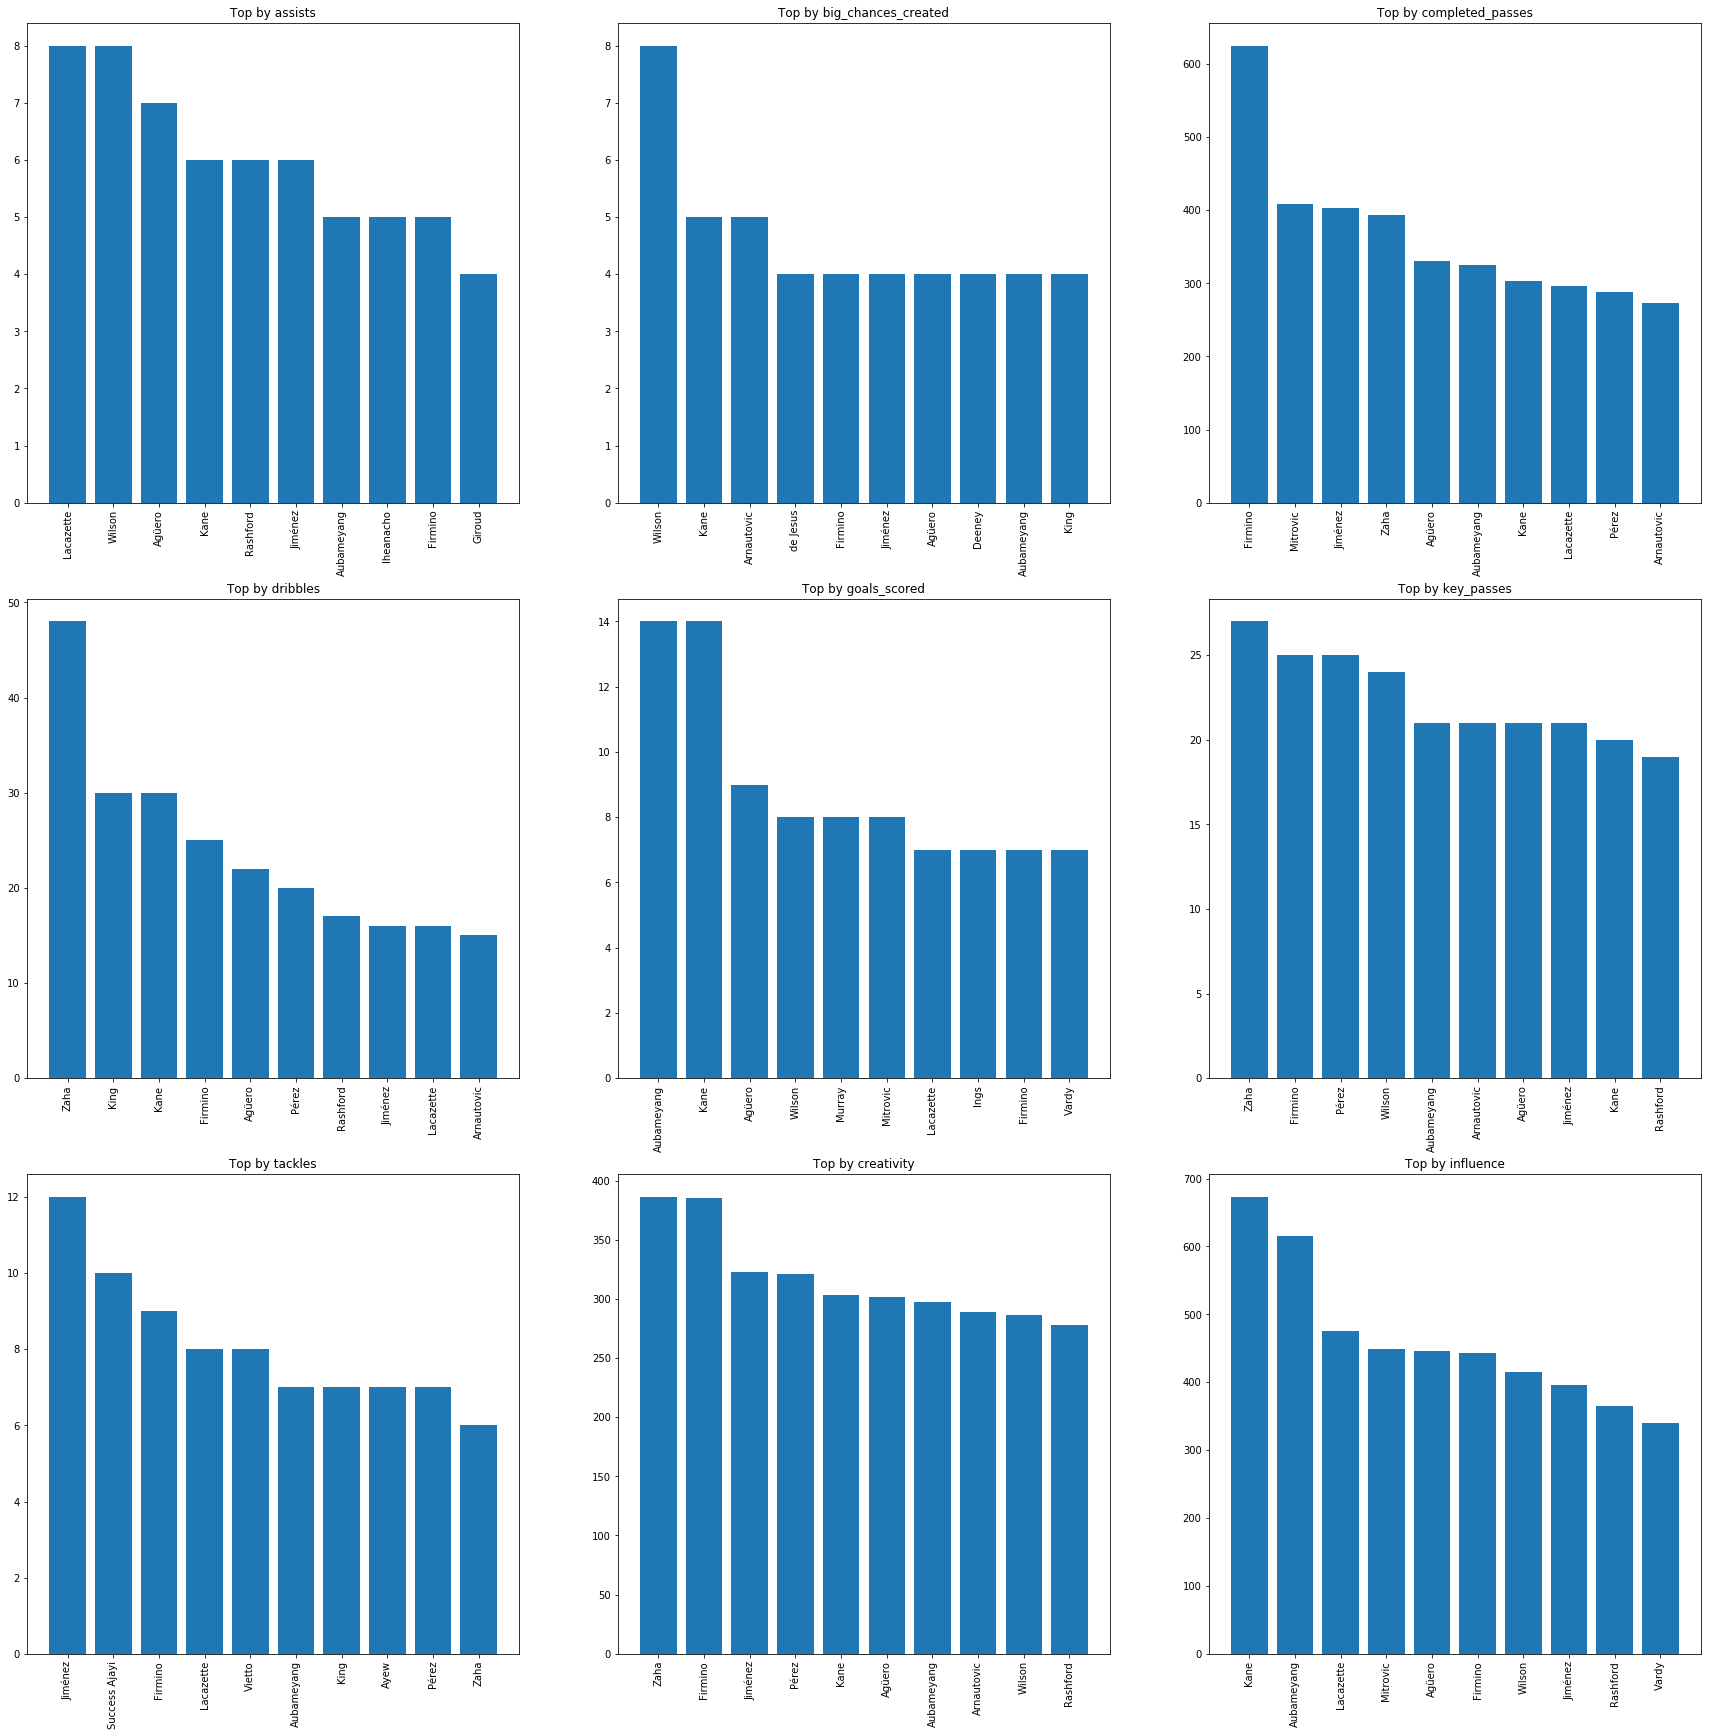

In [28]:
false_9_stats = forwards.groupby('player_id', as_index=False).agg({
    'assists': np.sum,
    'big_chances_created' : np.sum,
    'completed_passes' : np.sum,
    'dribbles' : np.sum,
    'goals_scored' : np.sum,
    'key_passes' : np.sum,
    'tackles' : np.sum,
    'creativity' : np.sum,
    'influence' : np.sum
})
false_9_stats = false_9_stats.merge(cleaned_players.loc[:, ['player_id','second_name']], on='player_id')

plt.figure(figsize=(30, 30))
for index, column in enumerate(false_9_stats.columns):
    if(column != 'player_id' and column != 'second_name'):
        top = false_9_stats.loc[:, ['second_name', column]].sort_values(column, ascending=False)[:10]
        plt.subplot(3, 3, index)
        plt.bar(top['second_name'], top[column])
        plt.xticks(rotation=90)
        plt.title('Top by {0}'.format(column))

plt.show()
        

/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


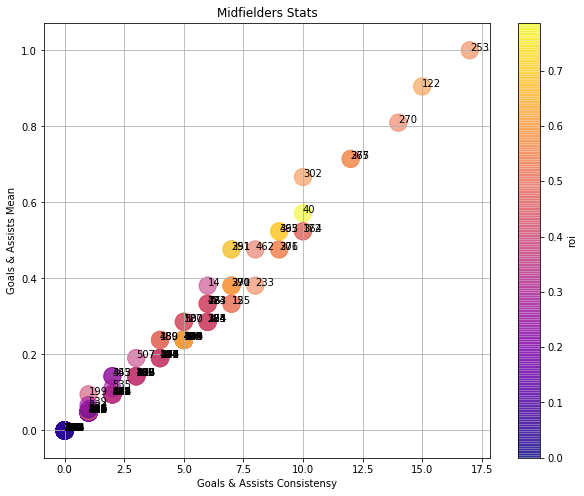

In [29]:
midfielderids = list(cleaned_players.loc[cleaned_players['element_type'] == 3, 'player_id'])
midfielders = players.loc[[ player_id in midfielderids for player_id in players['player_id']], :]

mid_stats_by_player_id = midfielders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'penalties_missed' : np.sum
})

plt.figure(figsize=(10, 8))

x = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
y = mid_stats_by_player_id['goals_scored']['mean'] +  mid_stats_by_player_id['assists']['mean'] 
colors = mid_stats_by_player_id['roi']['mean']
sizes = mid_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
cbar.ax.set_ylabel("roi")
plt.grid(True)
plt.title("Midfielders Stats")
for index, row in mid_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

In [30]:
goals_assists_consis = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
middle_bools = (goals_assists_consis == 6)
ids = mid_stats_by_player_id.loc[middle_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
12,14,Aaron,Ramsey,1,3,3,2,6,56,783,12,255.6,273.0,273.0,1,193,80.3,3,0,0,0.9,72,AaronRamsey
47,42,David,Brooks,2,91,3,5,2,72,1256,25,231.6,346.8,390.0,5,231,96.9,5,0,2,4.4,50,DavidBrooks
91,76,Johann Berg,Gudmundsson,4,90,3,2,5,63,1256,27,342.3,304.6,220.0,5,226,86.8,5,0,2,1.4,56,Johann BergGudmundsson
150,124,Willian,Borges Da Silva,6,8,3,2,4,68,1304,14,706.8,341.2,470.0,2,301,152.0,9,0,1,4.4,72,WillianBorges Da Silva
202,164,Theo,Walcott,8,11,3,3,3,72,1570,27,270.7,295.0,453.0,4,205,101.8,5,0,0,3.4,61,TheoWalcott
232,184,Ryan,Sessegnon,9,54,3,2,5,61,1358,41,328.8,305.2,276.0,3,202,91.2,0,0,0,2.1,60,RyanSessegnon
336,223,Riyad,Mahrez,13,43,3,5,2,69,937,7,286.5,303.6,488.0,9,232,107.9,3,0,0,2.2,84,RiyadMahrez
351,274,Ilkay,Gündogan,13,43,3,4,2,60,834,11,333.6,269.2,261.0,8,251,86.3,3,0,0,2.2,54,IlkayGündogan
460,363,Erik,Lamela,17,6,3,4,2,49,562,6,164.4,211.6,313.0,4,145,68.7,3,0,0,0.4,61,ErikLamela
462,365,Bamidele,Alli,17,6,3,4,2,63,1018,12,197.8,311.0,397.0,6,226,90.7,6,0,1,2.8,89,BamideleAlli


### Top Right cluster

In [31]:
top_right_bools = (mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']) >= 12 
ids = mid_stats_by_player_id.loc[top_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
148,122,Eden,Hazard,6,8,3,10,9,136,1493,13,779.0,739.2,790.0,19,482,231.1,7,0,2,38.9,111,EdenHazard
325,253,Mohamed,Salah,12,14,3,13,8,149,1665,7,596.0,724.8,1159.0,9,435,248.3,12,0,0,41.3,133,MohamedSalah
347,270,Raheem,Sterling,13,43,3,9,8,122,1383,13,529.2,572.8,830.0,14,416,193.4,7,0,1,10.5,113,RaheemSterling
352,275,Leroy,Sané,13,43,3,6,9,97,1075,10,449.7,449.4,685.0,7,326,158.6,5,0,1,9.4,95,LeroySané
464,367,Heung-Min,Son,17,6,3,8,7,104,987,10,250.2,444.2,503.0,10,317,119.6,7,0,1,17.1,88,Heung-MinSon


### Middle cluster

In [32]:
goals_assists_consis = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
middle_bools = (goals_assists_consis >= 8) & (goals_assists_consis <= 10)
ids = mid_stats_by_player_id.loc[middle_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names


,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
45,40,Ryan,Fraser,2,91,3,4,8,97,1588,32,677.1,485.0,311.0,12,399,147.6,4,0,1,21.0,61,RyanFraser
210,172,Gylfi,Sigurdsson,8,11,3,8,3,99,1708,27,639.0,533.0,564.0,12,366,173.5,5,0,3,6.3,73,GylfiSigurdsson
216,393,Richarlison,de Andrade,8,11,3,9,2,97,1562,26,170.5,447.6,735.0,11,245,134.8,4,1,2,29.5,70,Richarlisonde Andrade
299,233,James,Maddison,11,13,3,5,3,76,1474,22,671.2,441.4,364.0,7,340,147.4,5,1,1,4.9,68,JamesMaddison
331,462,Xherdan,Shaqiri,12,14,3,6,4,74,802,4,279.3,331.8,273.0,4,243,88.5,6,0,1,3.4,71,XherdanShaqiri
353,276,Bernardo Mota,Veiga de Carvalho e Silva,13,43,3,5,5,91,1578,15,543.6,458.4,504.0,11,376,150.7,6,0,2,6.6,75,Bernardo MotaVeiga de Carvalho e Silva
379,301,Anthony,Martial,14,1,3,8,2,82,961,17,319.4,381.2,397.0,11,270,109.7,1,0,1,8.3,73,AnthonyMartial
380,302,Paul,Pogba,14,1,3,7,7,97,1404,21,407.7,608.2,653.0,11,346,167.2,3,0,2,30.5,83,PaulPogba
461,364,Christian,Eriksen,17,6,3,4,7,81,1240,19,489.2,431.4,253.0,7,341,117.6,4,0,2,6.0,93,ChristianEriksen
532,465,Felipe Anderson,Pereira Gomes,19,21,3,8,3,103,1680,27,583.7,580.4,471.0,14,395,163.5,4,0,3,20.5,74,Felipe AndersonPereira Gomes


### Left cluster

In [33]:
left_bools = (goals_assists_consis >= 6) & (goals_assists_consis <= 7)
ids = mid_stats_by_player_id.loc[left_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
12,14,Aaron,Ramsey,1,3,3,2,6,56,783,12,255.6,273.0,273.0,1,193,80.3,3,0,0,0.9,72,AaronRamsey
13,15,Alex,Iwobi,1,3,3,2,5,53,1013,20,236.1,246.0,310.0,1,209,79.0,0,0,0,1.2,54,AlexIwobi
47,42,David,Brooks,2,91,3,5,2,72,1256,25,231.6,346.8,390.0,5,231,96.9,5,0,2,4.4,50,DavidBrooks
91,76,Johann Berg,Gudmundsson,4,90,3,2,5,63,1256,27,342.3,304.6,220.0,5,226,86.8,5,0,2,1.4,56,Johann BergGudmundsson
150,124,Willian,Borges Da Silva,6,8,3,2,4,68,1304,14,706.8,341.2,470.0,2,301,152.0,9,0,1,4.4,72,WillianBorges Da Silva
151,125,Pedro,Rodríguez Ledesma,6,8,3,6,1,71,937,6,241.3,325.4,390.0,9,250,95.2,4,0,1,3.3,63,PedroRodríguez Ledesma
202,164,Theo,Walcott,8,11,3,3,3,72,1570,27,270.7,295.0,453.0,4,205,101.8,5,0,0,3.4,61,TheoWalcott
232,184,Ryan,Sessegnon,9,54,3,2,5,61,1358,41,328.8,305.2,276.0,3,202,91.2,0,0,0,2.1,60,RyanSessegnon
323,251,Sadio,Mané,12,14,3,8,2,103,1495,7,322.1,436.2,641.0,13,323,139.9,10,0,1,19.3,95,SadioMané
336,223,Riyad,Mahrez,13,43,3,5,2,69,937,7,286.5,303.6,488.0,9,232,107.9,3,0,0,2.2,84,RiyadMahrez


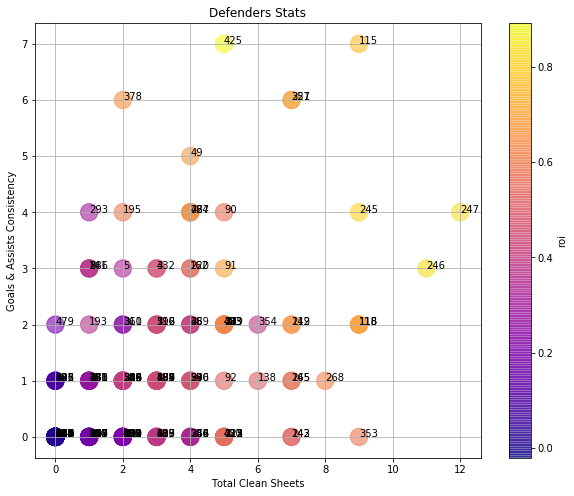

In [34]:
defenderids = list(cleaned_players.loc[cleaned_players['element_type'] == 2, 'player_id'])
defenders = players.loc[[ player_id in defenderids for player_id in players['player_id']], :]

def_stats_by_player_id = defenders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'goals_scored': base_aggregations + [consistency],
    'assists': base_aggregations + [consistency],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = def_stats_by_player_id['clean_sheets']['sum']
y = def_stats_by_player_id['goals_scored']['consistency'] +  def_stats_by_player_id['assists']['consistency'] 
colors = def_stats_by_player_id['roi']['mean']
sizes = def_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=300, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Goals & Assists Consistency")
cbar.ax.set_ylabel("roi")
plt.grid(True)
plt.title('Defenders Stats')

for index, row in def_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

### Far right cluster

In [35]:
goals_assists_consis = def_stats_by_player_id['goals_scored']['consistency'] + def_stats_by_player_id['assists']['consistency']
total_clean_sheets_consis = def_stats_by_player_id['clean_sheets']['sum']

far_right_bools = total_clean_sheets_consis >= 9

ids = def_stats_by_player_id.loc[far_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
139,113,César,Azpilicueta,6,8,2,0,2,81,1800,16,316.7,443.4,87.0,4,458,85.1,9,0,1,9.5,63,CésarAzpilicueta
141,115,Marcos,Alonso,6,8,2,1,7,109,1787,16,320.2,368.6,264.0,14,455,95.5,9,0,4,40.1,68,MarcosAlonso
142,116,David,Luiz Moreira Marinho,6,8,2,1,1,91,1710,14,164.5,461.8,165.0,12,428,78.9,9,0,1,11.9,59,DavidLuiz Moreira Marinho
144,118,Antonio,Rüdiger,6,8,2,1,1,85,1778,16,97.6,370.2,228.0,7,406,69.7,9,0,3,4.9,60,AntonioRüdiger
317,245,Trent,Alexander-Arnold,12,14,2,1,3,86,1322,6,323.5,313.6,155.0,8,339,79.1,9,0,3,20.1,51,TrentAlexander-Arnold
318,246,Virgil,van Dijk,12,14,2,1,2,105,1764,8,54.0,479.2,279.0,11,479,81.3,11,0,1,26.3,64,Virgilvan Dijk
319,247,Andrew,Robertson,12,14,2,0,4,110,1603,6,355.5,331.4,148.0,15,458,83.6,12,0,1,33.8,66,AndrewRobertson
450,353,Toby,Alderweireld,17,6,2,0,0,73,1700,16,43.6,403.8,113.0,5,413,55.9,9,0,1,4.3,60,TobyAlderweireld


### Middle right cluster

In [36]:
middle_right_bools = (total_clean_sheets_consis >= 6) & (total_clean_sheets_consis <= 8)

ids = def_stats_by_player_id.loc[middle_right_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
168,138,James,Tomkins,7,31,2,0,1,47,1499,21,58.4,289.4,124.0,0,296,47.4,6,0,5,2.5,43,JamesTomkins
172,142,Patrick,van Aanholt,7,31,2,1,1,72,1764,24,225.6,305.2,304.0,8,321,83.5,7,0,3,3.8,54,Patrickvan Aanholt
173,143,Mamadou,Sakho,7,31,2,0,0,64,1800,26,74.6,398.4,13.0,8,392,48.6,7,0,2,1.7,49,MamadouSakho
175,145,Aaron,Wan-Bissaka,7,31,2,0,1,67,1694,24,162.0,450.2,109.0,11,360,72.3,7,1,1,31.8,44,AaronWan-Bissaka
286,219,Benjamin,Chilwell,11,13,2,0,2,71,1800,22,338.1,345.4,152.0,5,311,83.9,7,0,1,2.5,51,BenjaminChilwell
288,221,Ricardo Domingos,Barbosa Pereira,11,13,2,2,4,92,1593,20,204.5,482.6,248.0,14,360,93.5,7,0,3,8.9,52,Ricardo DomingosBarbosa Pereira
314,242,Joseph,Gomez,12,14,2,0,0,52,1047,4,91.8,208.6,44.0,2,259,34.5,7,0,2,1.3,49,JosephGomez
342,265,Kyle,Walker,13,43,2,1,0,67,1354,11,181.1,251.8,84.0,4,316,51.7,7,0,0,11.1,64,KyleWalker
345,268,Aymeric,Laporte,13,43,2,1,0,74,1711,15,130.6,379.0,168.0,1,375,68.0,8,0,1,11.8,59,AymericLaporte
451,354,Danny,Rose,17,6,2,0,2,49,807,4,134.2,139.2,66.0,2,180,33.9,6,0,2,0.9,58,DannyRose


### Far top cluster

In [37]:
far_top_bools = goals_assists_consis >= 5

ids = def_stats_by_player_id.loc[far_top_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
56,49,Shane,Duffy,3,36,2,3,2,64,1467,22,47.9,533.2,157.0,5,300,73.9,4,1,3,4.1,46,ShaneDuffy
141,115,Marcos,Alonso,6,8,2,1,7,109,1787,16,320.2,368.6,264.0,14,455,95.5,9,0,4,40.1,68,MarcosAlonso
288,221,Ricardo Domingos,Barbosa Pereira,11,13,2,2,4,92,1593,20,204.5,482.6,248.0,14,360,93.5,7,0,3,8.9,52,Ricardo DomingosBarbosa Pereira
454,357,Kieran,Trippier,17,6,2,1,5,81,1354,14,419.9,365.0,88.0,8,364,87.3,7,0,2,18.6,61,KieranTrippier
482,378,José,Holebas,18,57,2,3,5,64,1445,24,427.8,465.2,111.0,6,297,100.5,2,0,7,13.2,48,JoséHolebas
544,425,Matt,Doherty,20,39,2,3,4,88,1759,23,350.8,488.8,453.0,9,358,129.1,5,0,2,24.4,52,MattDoherty


### Middle top cluster

In [38]:
middle_top_bools = (goals_assists_consis >= 3) & (goals_assists_consis <= 4)

ids = def_stats_by_player_id.loc[middle_top_bools,:]['player_id']

names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
3,4,Héctor,Bellerín,1,3,2,0,4,48,1440,21,181.5,220.4,274.0,3,261,67.4,3,0,3,6.2,54,HéctorBellerín
4,5,Nacho,Monreal,1,3,2,1,2,37,780,11,103.1,198.4,163.0,3,166,46.4,2,0,1,0.9,54,NachoMonreal
7,8,Sead,Kolasinac,1,3,2,0,4,39,865,15,238.4,140.6,90.0,8,186,46.6,1,0,1,3.9,49,SeadKolasinac
87,72,James,Tarkowski,4,90,2,3,1,56,1466,36,33.1,547.6,254.0,4,279,83.6,4,0,4,4.4,47,JamesTarkowski
112,90,Sean,Morrison,5,97,2,0,4,58,1869,41,172.4,398.6,316.0,2,298,88.7,5,0,3,0.6,47,SeanMorrison
113,91,Sol,Bamba,5,97,2,2,1,66,1800,36,35.0,551.2,222.0,8,328,80.9,5,0,4,2.1,45,SolBamba
171,141,Jeffrey,Schlupp,7,31,2,3,0,42,788,13,89.4,199.8,190.0,0,125,48.1,1,0,1,2.1,44,JeffreySchlupp
200,162,Michael,Keane,8,11,2,1,2,66,1620,26,74.0,418.2,221.0,11,330,71.6,4,0,0,3.7,49,MichaelKeane
219,484,Lucas,Digne,8,11,2,3,2,75,1609,26,624.1,496.4,184.0,9,365,130.4,4,0,3,12.8,52,LucasDigne
257,195,Mathias,Jorgensen,10,38,2,3,1,55,1607,29,79.5,434.6,147.0,4,304,66.4,2,0,6,3.3,44,MathiasJorgensen


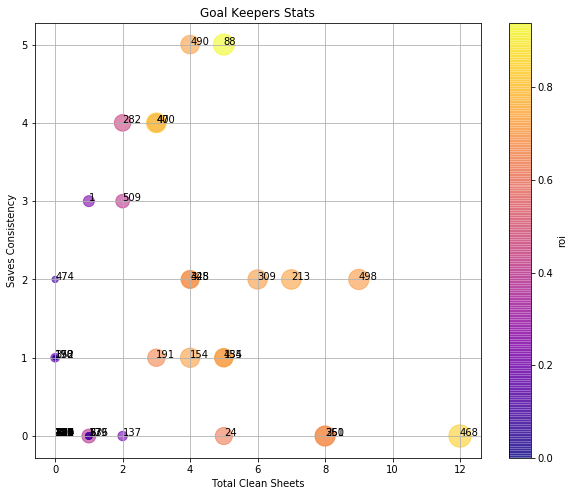

In [39]:
def save_consistensy(saves):
    return sum(saves > 5)
goalkeeperids = list(cleaned_players.loc[cleaned_players['element_type'] == 1, 'player_id'])
goalkeepers = players.loc[[ player_id in goalkeeperids for player_id in players['player_id']], :]

gk_stats_by_player_id = goalkeepers.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'saves' : base_aggregations + [save_consistensy],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = gk_stats_by_player_id['clean_sheets']['sum']
y = gk_stats_by_player_id['saves']['save_consistensy']
colors = gk_stats_by_player_id['roi']['mean']
sizes = gk_stats_by_player_id['points']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 5, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Saves Consistency")
cbar.ax.set_ylabel("roi")
plt.title("Goal Keepers Stats")
plt.grid(True)

for index, row in gk_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

In [40]:
ids = [468, 490, 498, 88, 260, 282, 400]
names = cleaned_players.loc[[player_id in list(ids)  for player_id in cleaned_players['player_id']], :]
names

,player_id,first_name,second_name,team,team_code,element_type,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,fullname
104,490,Joe,Hart,4,90,1,0,0,69,1710,41,10.1,594.6,0.0,7,378,60.3,4,0,0,8.0,45,JoeHart
110,88,Neil,Etheridge,5,97,1,0,0,89,1890,41,0.0,671.2,0.0,11,439,67.0,5,0,2,7.3,45,NeilEtheridge
163,498,Kepa,Arrizabalaga,6,8,1,0,0,82,1800,16,0.1,336.2,0.0,3,374,33.4,9,0,1,6.4,56,KepaArrizabalaga
332,468,Alisson,Ramses Becker,12,14,1,0,0,100,1800,8,0.0,380.0,0.0,5,429,37.9,12,0,0,24.4,59,AlissonRamses Becker
337,260,Ederson,Santana de Moraes,13,43,1,0,1,82,1800,16,23.0,316.8,0.0,4,344,34.0,8,0,1,21.8,56,EdersonSantana de Moraes
360,282,David,De Gea,14,1,1,0,0,55,1800,32,0.0,464.2,0.0,1,323,46.5,2,0,0,14.6,57,DavidDe Gea
509,400,Lukasz,Fabianski,19,21,1,0,0,79,1800,30,10.0,583.8,0.0,11,387,59.2,3,0,0,18.9,48,LukaszFabianski


## The Crossers

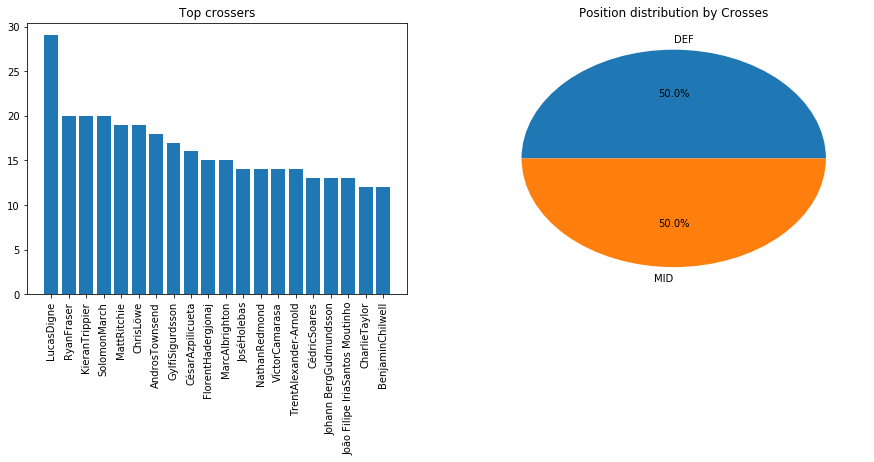

In [41]:
crossers = players.groupby('player_id', as_index=False)['open_play_crosses'].sum()

crossers = crossers.merge(cleaned_players.loc[:, ['player_id', 'fullname', 'element_type','team']], on='player_id')

#merge with elemen_types
crossers = pd.merge(crossers, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
crossers.drop(columns=['id', 'element_type'], inplace=True)
crossers.rename(columns={'singular_name_short': 'position'}, inplace=True)

#merge with teams
crossers = pd.merge(crossers, teams.loc[:, ['id', 'name']], left_on='team', right_on='id')
crossers.drop(columns=['id', 'team'], inplace=True)
crossers.rename(columns={'name':'team'}, inplace=True)

top = crossers.sort_values('open_play_crosses', ascending=False)[:20]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(top['fullname'], top['open_play_crosses'])
plt.xticks(rotation=90)
plt.title("Top crossers")

n_def, n_mid = top.loc[top['position'] == 'DEF', :].shape[0],top.loc[top['position'] == 'MID', :].shape[0]

plt.subplot(122)
plt.pie([n_def, n_mid], labels=['DEF', 'MID'], autopct='%1.1f%%')
plt.title("Position distribution by Crosses")
plt.show()


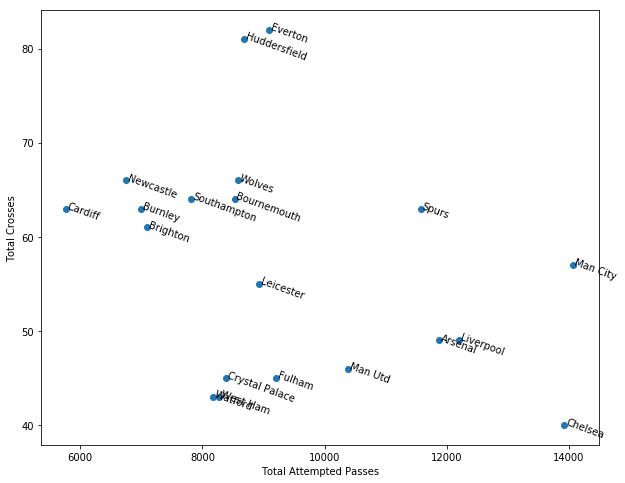

In [42]:
passers = players.groupby('player_id', as_index=False)['attempted_passes'].sum()
crossers = crossers.merge(passers, on='player_id')
crosses_by_team = crossers.groupby('team', as_index=False).agg({
    'open_play_crosses' : np.sum,
    'attempted_passes' : np.sum
})

top_crosses_team = crosses_by_team.sort_values('open_play_crosses', ascending=False)
plt.figure(figsize=(10, 8))
x = top_crosses_team['attempted_passes']
y = top_crosses_team['open_play_crosses']
plt.scatter(x, y)
plt.xlabel('Total Attempted Passes')
plt.ylabel('Total Crosses')

for index, row in top_crosses_team.iterrows():
    plt.gca().annotate(row['team'], (x[index], y[index]), rotation=-20)
    
plt.show()

## The Error Makers

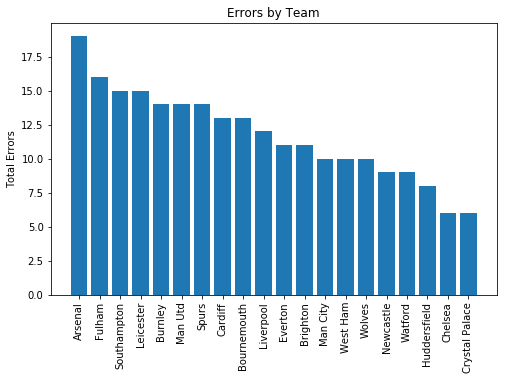

In [43]:
players_stats = players.groupby('player_id', as_index=False).agg({
    'own_goals' : np.sum,
    'errors_leading_to_goal' : np.sum,
    'errors_leading_to_goal_attempt' : np.sum
})
players_stats = pd.merge(players_stats, cleaned_players.loc[:, ['player_id', 'fullname', 'element_type', 'team']], on='player_id')

players_stats = pd.merge(players_stats, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
players_stats.drop(columns=['element_type', 'id'], inplace=True)
players_stats.rename(columns={'singular_name_short':'position'}, inplace=True)

players_stats = pd.merge(players_stats, teams.loc[:, ['id','name']], left_on='team', right_on='id')
players_stats.drop(columns=['team','id'], inplace=True)
players_stats.rename(columns={'name': 'team'}, inplace=True)

players_stats['errors'] = players_stats['own_goals'] + players_stats['errors_leading_to_goal'] + players_stats['errors_leading_to_goal_attempt']

error_makers_by_team = players_stats.groupby('team', as_index=False)['errors'].sum().sort_values('errors', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(error_makers_by_team['team'], error_makers_by_team['errors'])
plt.xticks(rotation=90)
plt.ylabel('Total Errors')
plt.title('Errors by Team')
plt.show()


## Correlations between Bonus and other features

In [44]:
df = pd.merge(players, cleaned_players.loc[:, ['player_id', 'element_type', 'team']], on='player_id')
df = pd.merge(df, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
df.drop(columns=['element_type', 'id_y','id_x'], inplace=True)
df.rename(columns={'singular_name_short': 'position'}, inplace=True)

df = pd.merge(df, teams.loc[:, ['id', 'name']], left_on='team', right_on='id')
df.drop(columns=['id', 'team'], inplace=True)
df.rename(columns={'name':'team'}, inplace=True)
columns_to_drop = ['gw', 'player_id', 'fixture', 'kickoff_time','kickoff_time_formatted','selected','team_a_score', 'team_h_score', 'position', 'team', 'opponent_team']

attackers = df.loc[df['position'] == 'FWD',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Forwards Bonus correlation")
bonus_corr


Forwards Bonus correlation


bonus                              1.000000
points                             0.830864
bps                                0.830067
goals_scored                       0.815658
influence                          0.806213
roi                                0.785808
ict_index                          0.636080
winning_goals                      0.581368
threat                             0.486732
minutes                            0.356184
attempted_passes                   0.355061
completed_passes                   0.353491
recoveries                         0.327643
creativity                         0.303136
key_passes                         0.268156
tackles                            0.267636
value                              0.265638
clearances_blocks_interceptions    0.263715
assists                            0.247384
target_missed                      0.227654
dribbles                           0.212195
tackled                            0.203351
Name: bonus, dtype: float64

<span style='color:green'>Surprisingly, target_missed has positive correlation with bonus?</span><br>
<span style='color:green'>Maybe the more they miss targets means the more opportunities they try, and that results in the more bonus he got</span>

In [45]:
attackers = df.loc[df['position'] == 'MID',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Midfielders Bonus correlation")
bonus_corr

Midfielders Bonus correlation


bonus                  1.000000
points                 0.774085
roi                    0.727965
goals_scored           0.722343
influence              0.698840
bps                    0.684453
ict_index              0.563301
winning_goals          0.465528
threat                 0.410033
creativity             0.334342
assists                0.333146
big_chances_created    0.310191
key_passes             0.309273
attempted_passes       0.262434
minutes                0.261494
completed_passes       0.258816
dribbles               0.235093
recoveries             0.216119
value                  0.214553
Name: bonus, dtype: float64

<span style='color:green'>Kind of same as Forwards</span>

In [46]:
attackers = df.loc[df['position'] == 'DEF',:].drop(columns=columns_to_drop)

bonus_corr = attackers.corr()['bonus']
bonus_corr = bonus_corr[np.abs(bonus_corr) > 0.2].sort_values(ascending=False)

print("Defenders Bonus correlation")
bonus_corr

Defenders Bonus correlation


bonus                              1.000000
points                             0.713034
roi                                0.701345
bps                                0.551116
influence                          0.462533
ict_index                          0.449777
clean_sheets                       0.429977
assists                            0.390047
goals_scored                       0.367507
winning_goals                      0.329409
threat                             0.287908
attempted_passes                   0.284432
completed_passes                   0.280147
creativity                         0.265373
minutes                            0.264170
key_passes                         0.261140
tackles                            0.258639
big_chances_created                0.257294
recoveries                         0.255710
clearances_blocks_interceptions    0.239414
Name: bonus, dtype: float64

## Influence, Creativity and Threat analysis
 source: https://www.premierleague.com/news/65567

#### 1. Influence

Influence is the first measurement. This evaluates the degree to which that player has made an impact on a single match or throughout the season.

It takes into account events and actions that could directly or indirectly effect the outcome of the fixture.

At the top level these are decisive actions like goals and assists. But the Influence score also processes significant defensive actions to analyse the effectiveness of defenders and goalkeepers.


#### 2. Creativity
Creativity assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists.

While this analyses frequency of passing and crossing, it also considers pitch location and quality of the final ball.


#### 3. Threat
This is the third measure, producing a value that examines a player's threat on goal. It gauges individuals most likely to score goals.

While attempts are the key action, the Index looks at pitch location, giving greater weight to actions that are regarded as the best chances to score.

All three of these scores are combined to create an overall ICT Index score. That then offers a single figure that presents a view on that player as an FPL asset

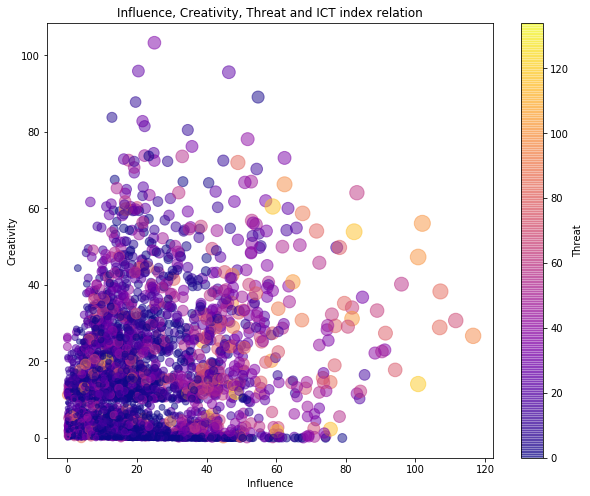

In [47]:
x = players['influence']
y = players['creativity']
colors = players['threat']
sizes = players['ict_index']

plt.figure(figsize=(10,8))
plt.scatter(x, y, c=colors, cmap='plasma', s=sizes*10, alpha=0.5)
cbar = plt.colorbar()
plt.title("Influence, Creativity, Threat and ICT index relation")
plt.xlabel("Influence")
plt.ylabel("Creativity")
cbar.ax.set_ylabel("Threat")
plt.show()

In [48]:
attributes = ['influence', 'creativity', 'threat', 'ict_index']
df = players[attributes]
corr_mx = df.corr()
corr_mx

,influence,creativity,threat,ict_index
influence,1.000000,0.497740,0.535181,0.841317
creativity,0.497740,1.000000,0.466650,0.770447
threat,0.535181,0.466650,1.000000,0.834181
ict_index,0.841317,0.770447,0.834181,1.000000


/Users/80151/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


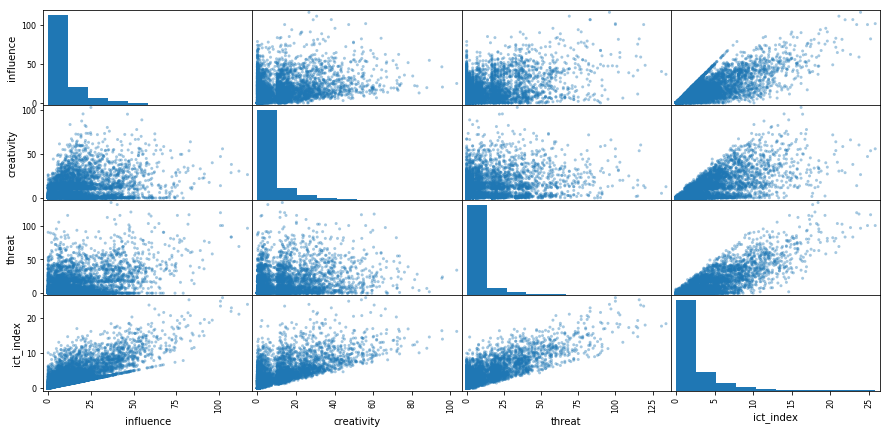

In [49]:
scatter_matrix(df, figsize=(15, 7), alpha=0.4)
plt.show()

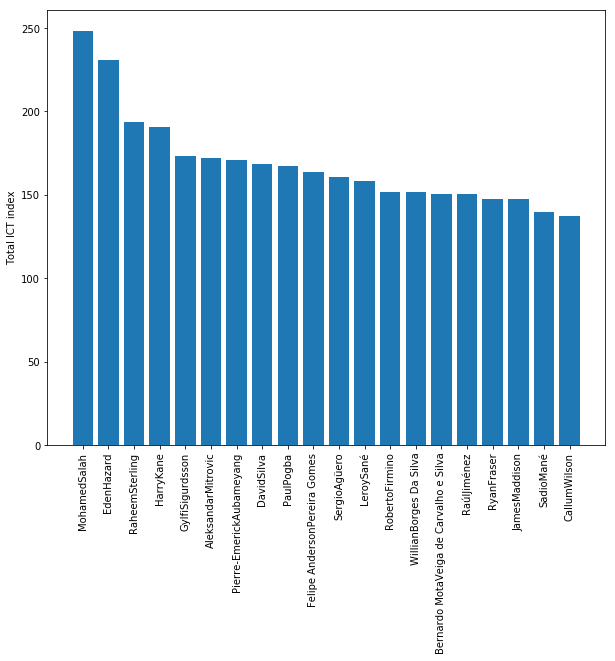

In [50]:
df = players.groupby('player_id', as_index=False).agg({
    'ict_index': np.sum,
    'bps': np.sum,
    'bonus' : np.sum
})
df = df.merge(cleaned_players.loc[:, ['player_id', 'fullname']], on='player_id')
top_by_ict = df.sort_values('ict_index', ascending=False)[:20]

plt.figure(figsize=(10, 8))
plt.bar(top_by_ict['fullname'], top_by_ict['ict_index'])
plt.xticks(rotation=90)
plt.ylabel('Total ICT index')
plt.show()

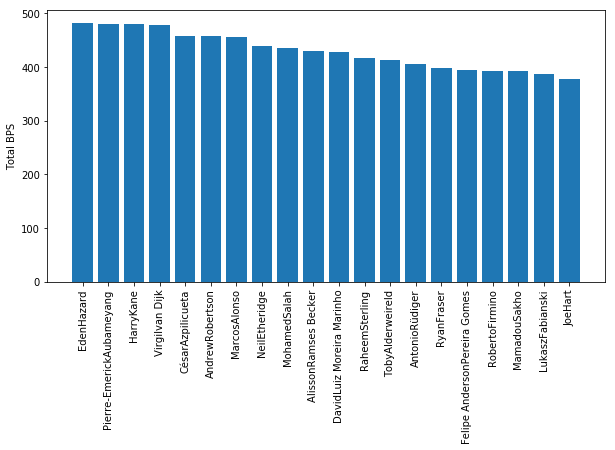

In [51]:
top_by_bps = df.sort_values('bps', ascending=False)[:20]
bps = top_by_bps['bps']
bonus = top_by_bps['bonus']

plt.figure(figsize=(10, 5))
plt.bar(top_by_bps['fullname'], top_by_bps['bps'])
plt.xticks(rotation=90)
plt.ylabel('Total BPS')
plt.show()

In [53]:
performance_attributes = ['ict_index', 'influence','creativity','threat','assists', 'attempted_passes', 'big_chances_created', 'big_chances_missed', 'clean_sheets', 'clearances_blocks_interceptions', 'completed_passes', 'dribbles', 'ea_index', 'errors_leading_to_goal','errors_leading_to_goal_attempt','fouls','goals_conceded', 'goals_scored', 'key_passes', 'minutes', 'offside', 'open_play_crosses', 'own_goals', 'penalties_conceded', 'penalties_missed', 'penalties_saved', 'recoveries', 'red_cards', 'yellow_cards', 'saves','tackled', 'tackles','target_missed']
computed_index = ['ict_index', 'influence', 'creativity', 'threat']

df = players[['player_id'] + performance_attributes]
df = pd.merge(df, cleaned_players.loc[:, ['player_id', 'element_type', 'team']], on='player_id')

df = pd.merge(df, element_types.loc[:, ['id', 'singular_name_short']], left_on='element_type', right_on='id')
df.drop(columns=['id', 'element_type'], inplace=True)
df.rename(columns={'singular_name_short': 'position'}, inplace=True)

df = pd.merge(df, teams.loc[:, ['id', 'name']], left_on='team', right_on='id')
df.drop(columns=['id','team'], inplace=True)
df.rename(columns={'name': 'team'}, inplace=True)

fw_influence_corr = forwards[performance_attributes].corr()['influence'].sort_values(ascending=False)
fw_influence_corr = fw_influence_corr[[attr not in computed_index for attr in list(fw_influence_corr.index)]]
fw_influence_corr = fw_influence_corr[np.abs(fw_influence_corr) > 0.4]   

fw_influence_corr


goals_scored        0.917906
attempted_passes    0.555983
completed_passes    0.555306
minutes             0.552966
key_passes          0.467667
recoveries          0.440762
tackled             0.407525
assists             0.403871
Name: influence, dtype: float64